In [1]:
import numpy as np
from tracker import ModelPerformanceTracker
from dataset_loader import generate_multivariate_dataset_random_split

target_function = lambda x, y: ((x**2 + y - 1.5 * np.pi)**2 + (x + y**2 - np.pi)**2) / 200

# Set parameters for the dataset
x_range = (-np.pi, np.pi)  # Range of x
y_range = (-np.pi, np.pi)  # Range of y
num_points = 20  # Number of points for x and y (total samples will be num_points * num_points)
batch_size = 32  # Batch size for DataLoader
sequence_length = 1  # Number of sequential points to use for input
epochs = 20

# Generate the dataset and DataLoaders
multivariate_dataset = generate_multivariate_dataset_random_split(
    function=target_function,
    x_range=x_range,
    y_range=y_range,
    num_points=num_points,
    batch_size=batch_size
)

tracker = ModelPerformanceTracker()

In [2]:
from classic import CNN, RNN, LSTM
from quantum import QNN, QNN_Tayler
from torch import optim
from model_fit_evaluate import train_and_test

cnn_model = CNN(2)
rnn_model = RNN(2)
lstm_model = LSTM(2)
QNN_model = QNN(2)
QNN_Tayler_model = QNN_Tayler(2)

cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.005)
rnn_optimizer = optim.Adam(rnn_model.parameters(), lr=0.005)
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.005)
QNN_optimizer = optim.Adam(QNN_model.parameters(), lr=0.005)
QNN_Tayler_optimizer = optim.Adam(QNN_Tayler_model.parameters(), lr=0.005)

results_cnn = train_and_test(cnn_model, cnn_optimizer, multivariate_dataset, epochs=epochs, model_name="CNN", tracker=tracker)
results_rnn = train_and_test(rnn_model, rnn_optimizer, multivariate_dataset, epochs=epochs, model_name="RNN", tracker=tracker)
results_lstm = train_and_test(lstm_model, lstm_optimizer, multivariate_dataset, epochs=epochs, model_name="LSTM", tracker=tracker)
results_qnn = train_and_test(QNN_model, QNN_optimizer, multivariate_dataset, epochs=epochs, model_name="QNN", tracker=tracker)
results_qnn_tayler = train_and_test(QNN_Tayler_model, QNN_Tayler_optimizer, multivariate_dataset, epochs=epochs, model_name="QNN_Tayler", tracker=tracker)

Training QNN_Tayler: 100%|██████████| 20/20 [40:48<00:00, 122.42s/epoch, Train Loss=0.1646, Valid Loss=0.1922, Epoch Time (s)=119.98]


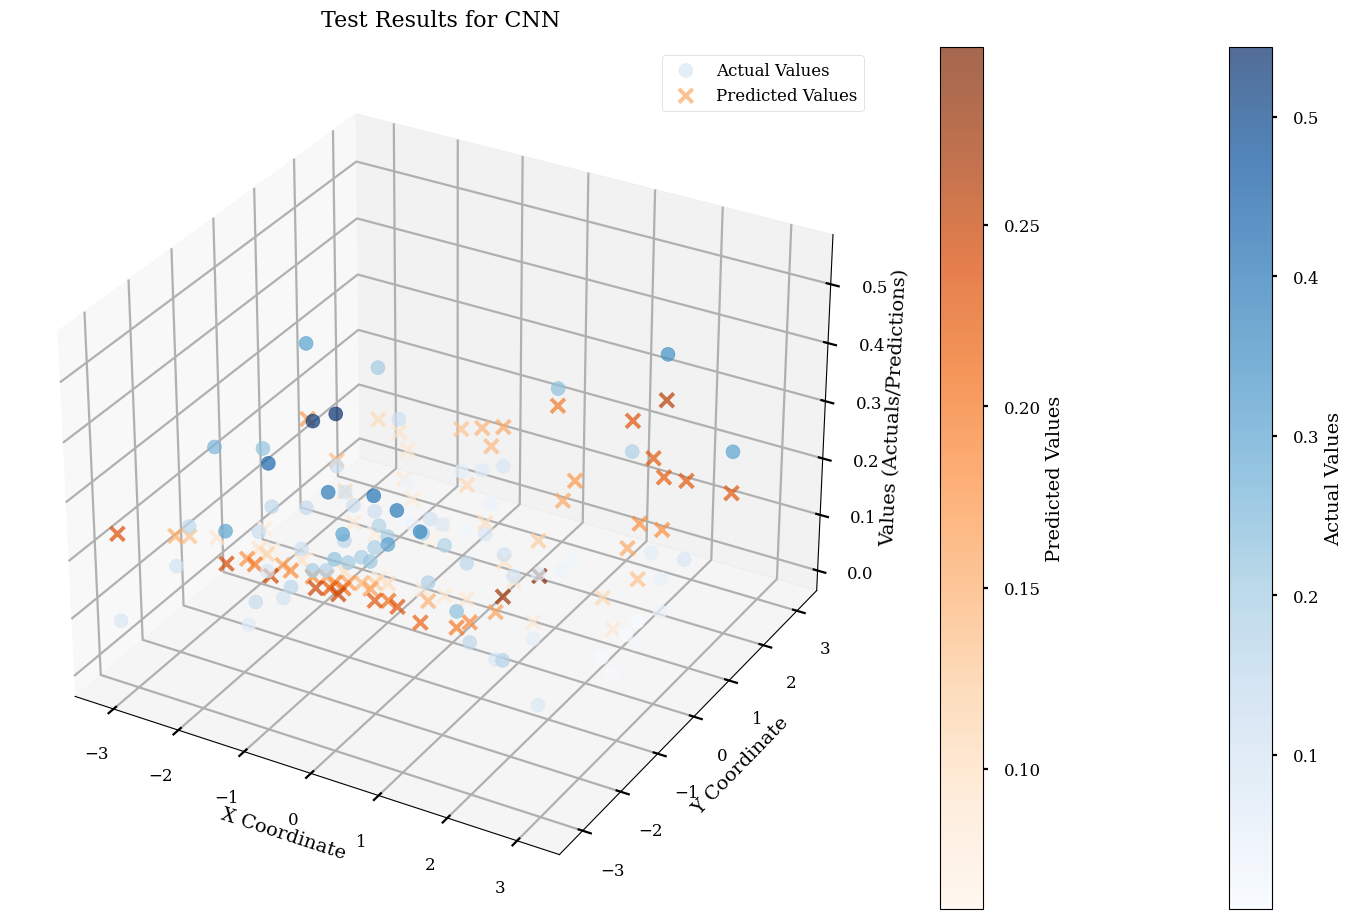

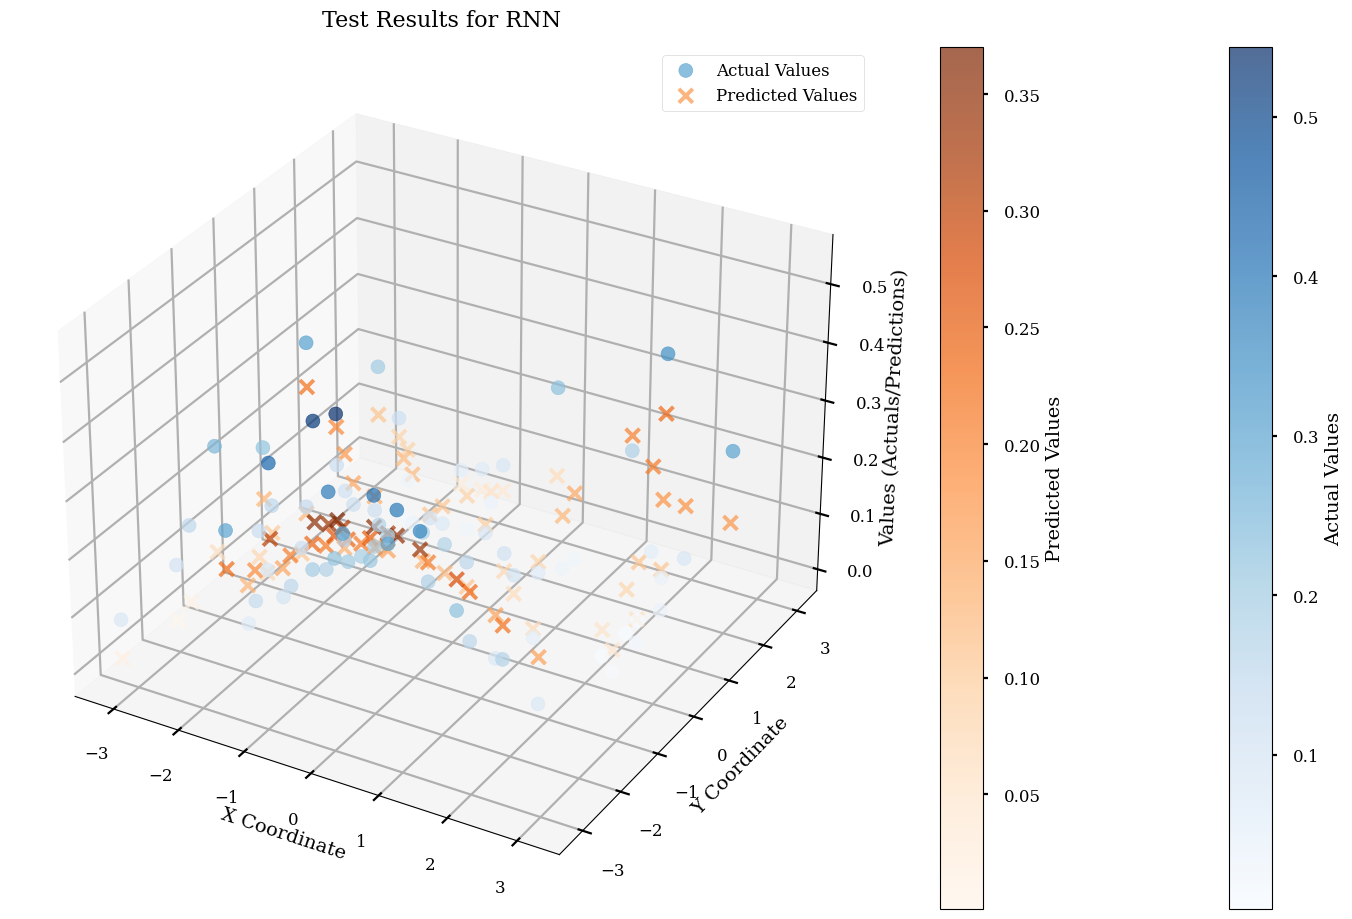

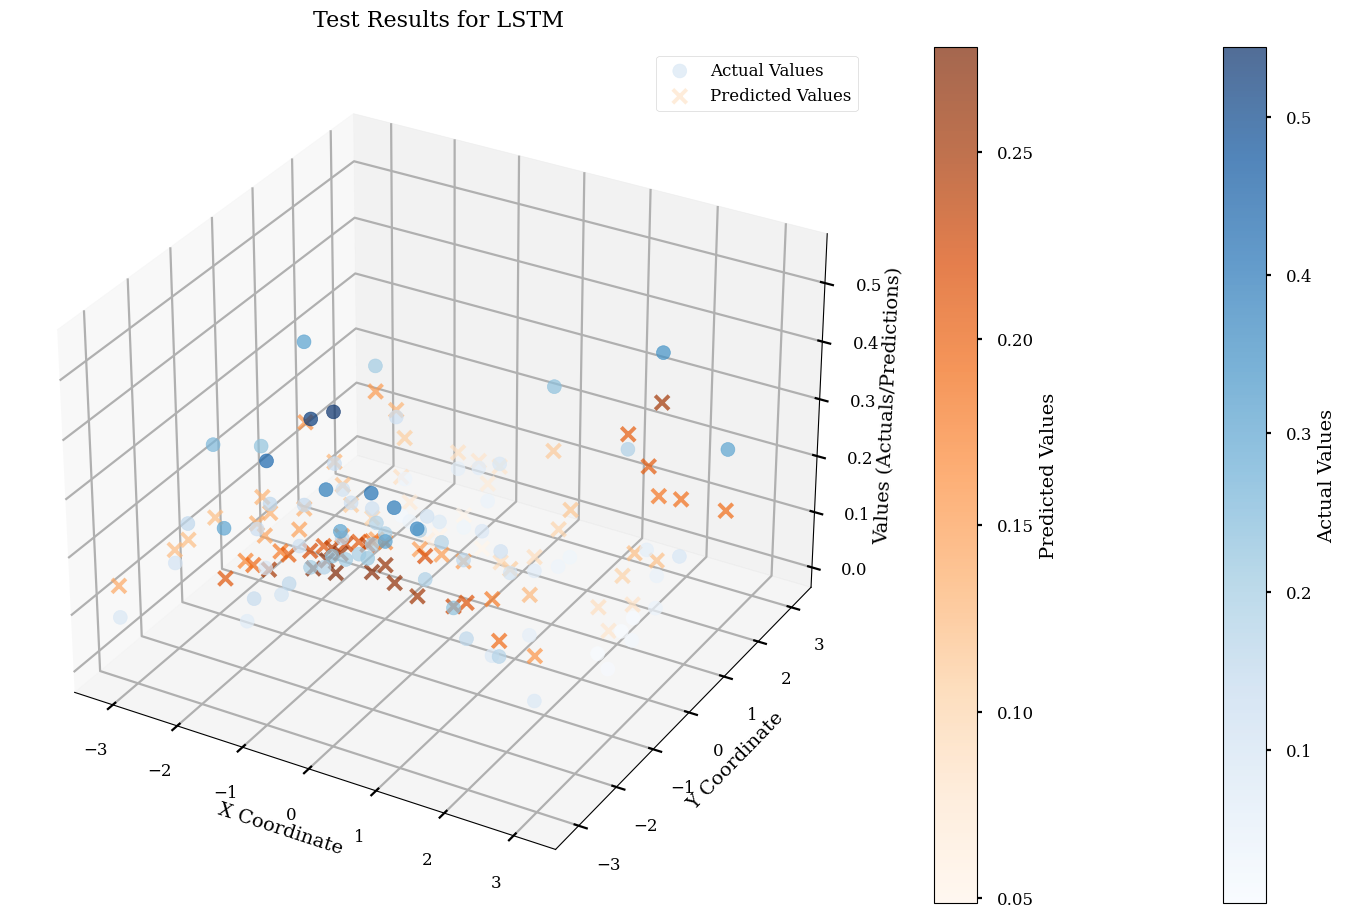

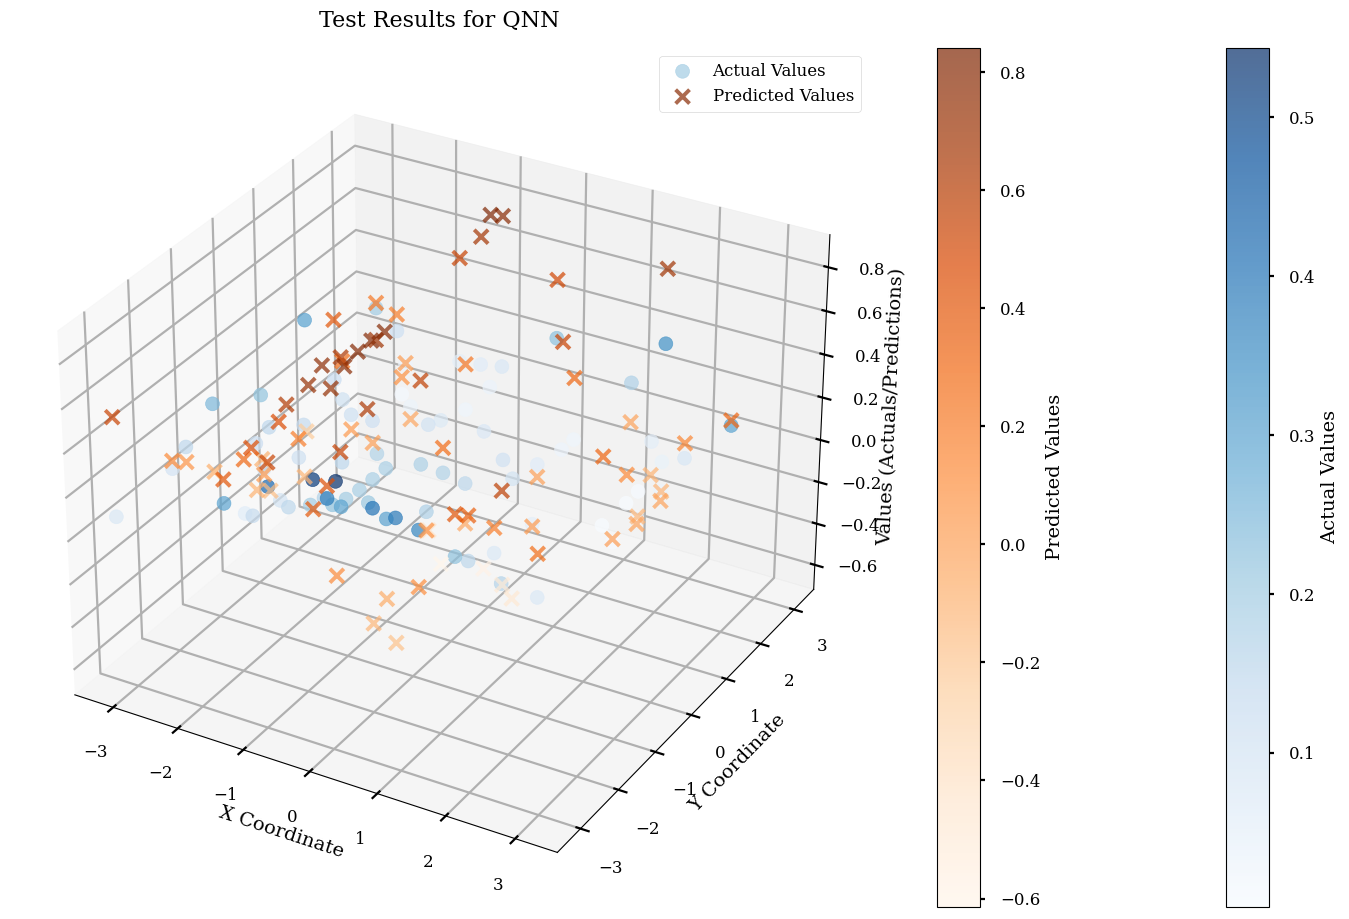

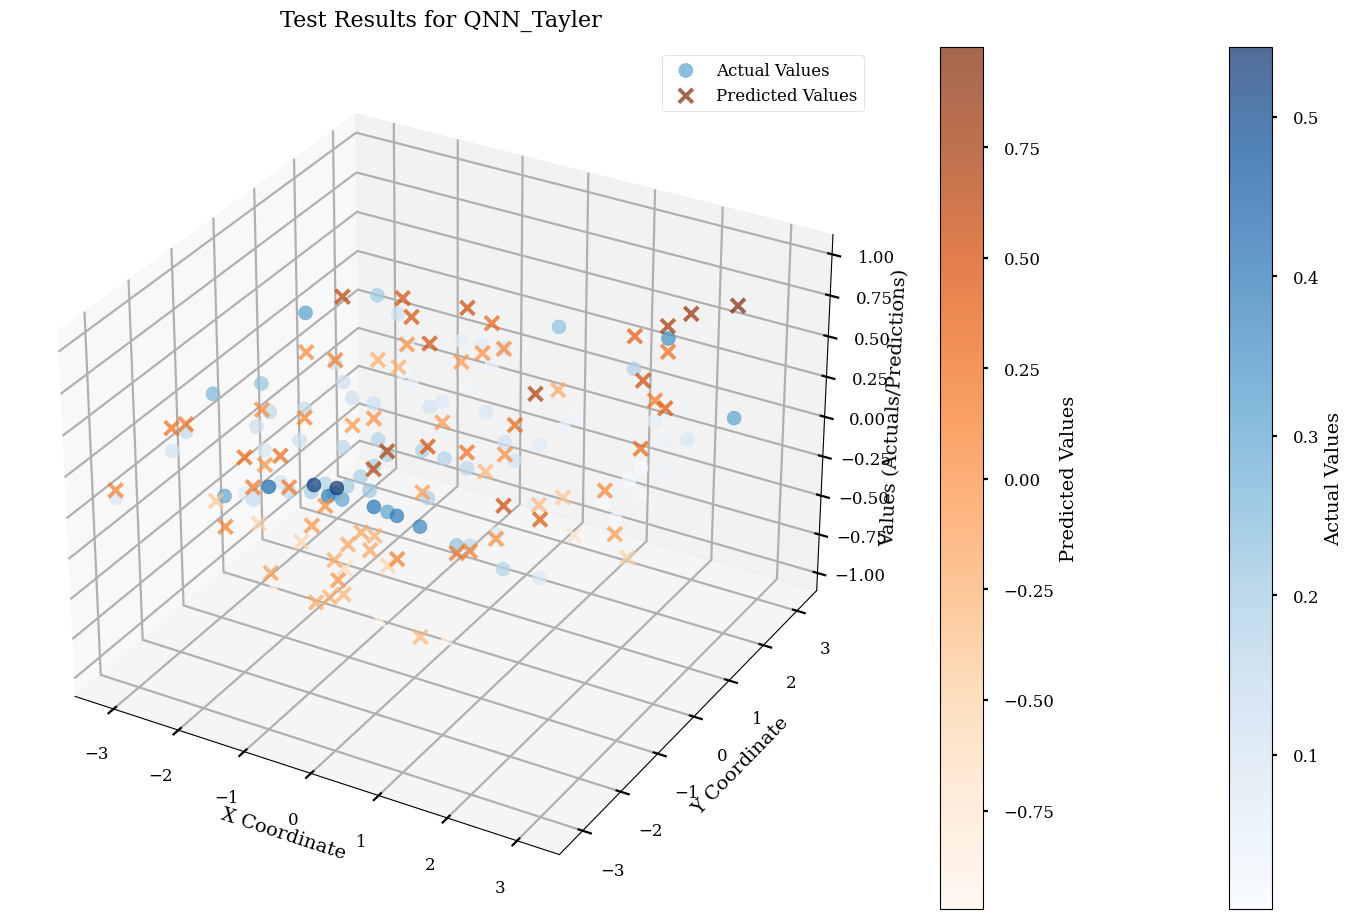

In [3]:
tracker.plot_test_result("CNN")
tracker.plot_test_result("RNN")
tracker.plot_test_result("LSTM")
tracker.plot_test_result("QNN")
tracker.plot_test_result("QNN_Tayler")

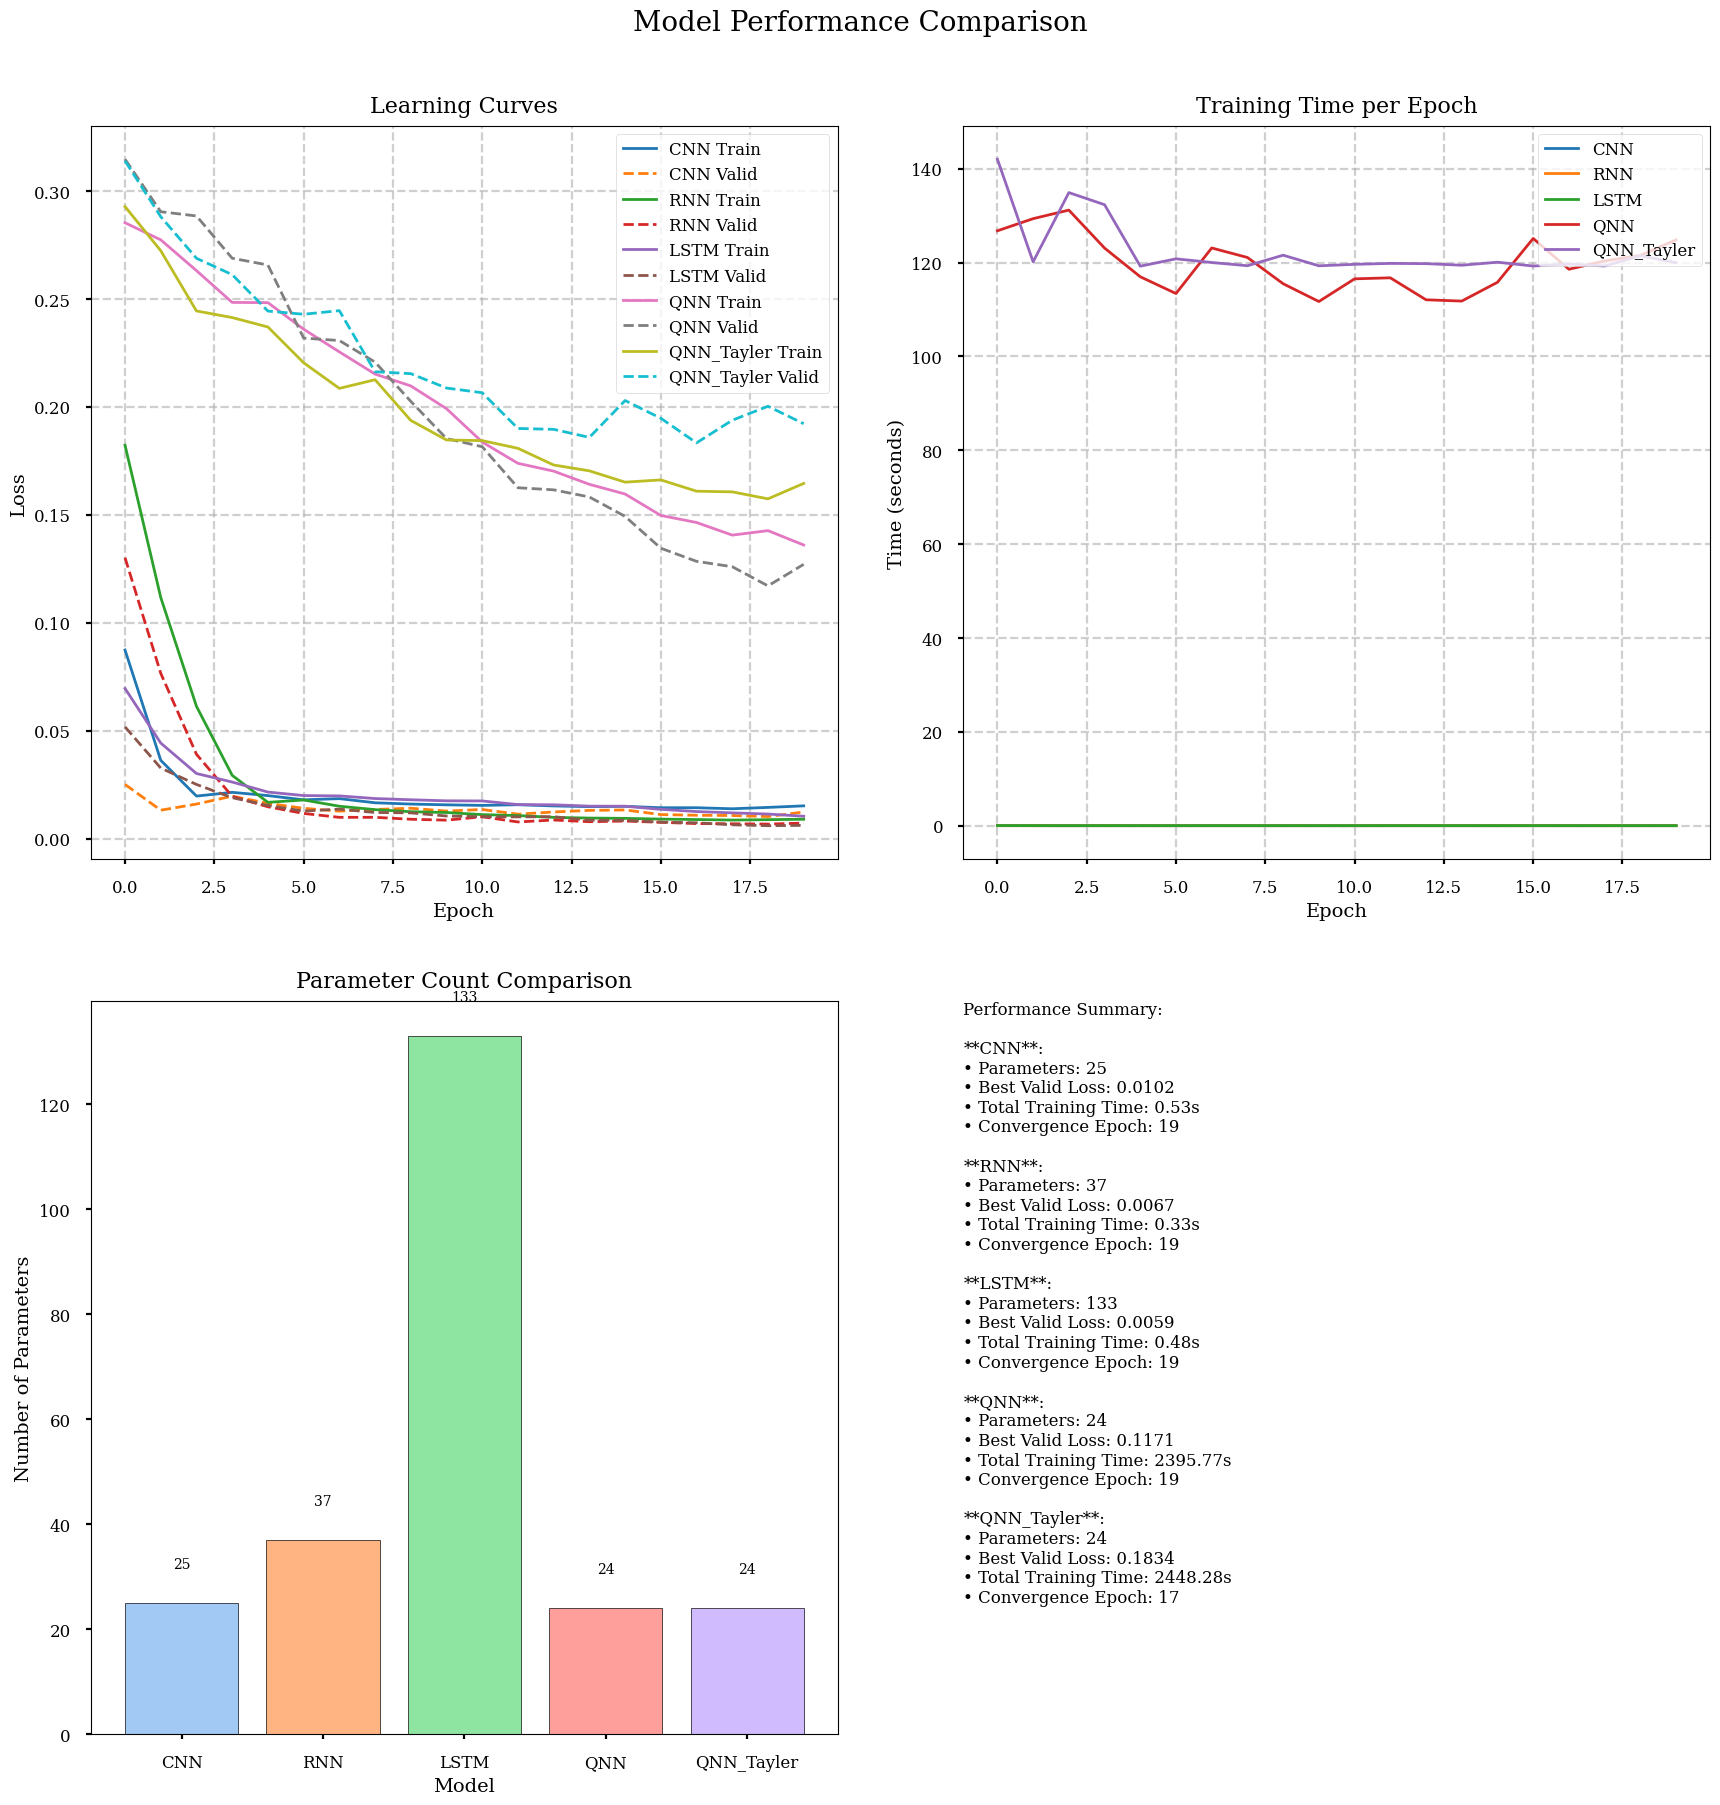

In [4]:
tracker.plot_performance_comparison()